In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.figure as fig

## Base Binário

In [2]:
norm_pred_binario = pd.read_csv('Metrics/norm_pred_binario.csv')
bl_binario = pd.read_csv('Metrics/bl_binario.csv')
svd_binario = pd.read_csv('Metrics/svd_binario.csv')
svdpp_binario = pd.read_csv('Metrics/svdpp_binario.csv')
nmf_binario = pd.read_csv('Metrics/nmf_binario.csv')

In [3]:
metrics_binario = pd.DataFrame(data=norm_pred_binario)
metrics_binario = metrics_binario.append(bl_binario)
metrics_binario = metrics_binario.append(svd_binario)
metrics_binario = metrics_binario.append(svdpp_binario)
metrics_binario = metrics_binario.append(nmf_binario)

In [4]:
index = pd.Series(['Normal Predictor', 'Baseline Only', 'SVD', 'SVD++', 'NMF'])

metrics_binario.set_index(index, inplace=True)
metrics_binario.head()

,RMSE,MAE,RMSE Sale,MAE Sale,Hit Rate K = 5,Hit Rate K = 10
Normal Predictor,0.121751,0.053705,0.957157,0.955182,0.036364,0.071515
Baseline Only,0.098231,0.019554,0.961778,0.960090,0.215354,0.378182
SVD,0.100802,0.024742,0.955800,0.953074,0.164848,0.246061
SVD++,0.102211,0.027560,0.953922,0.950679,0.131313,0.189899
NMF,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Base Pesos

In [5]:
norm_pred_pesos = pd.read_csv('Metrics/norm_pred_pesos.csv')
bl_pesos = pd.read_csv('Metrics/bl_pesos.csv')
svd_pesos = pd.read_csv('Metrics/svd_pesos.csv')
svdpp_pesos = pd.read_csv('Metrics/svdpp_pesos.csv')
nmf_pesos = pd.read_csv('Metrics/nmf_pesos.csv')

In [6]:
metrics_pesos = pd.DataFrame(data=norm_pred_pesos)
metrics_pesos = metrics_pesos.append(bl_pesos)
metrics_pesos = metrics_pesos.append(svd_pesos)
metrics_pesos = metrics_pesos.append(svdpp_pesos)
metrics_pesos = metrics_pesos.append(nmf_pesos)

In [7]:
metrics_pesos.set_index(index, inplace=True)
metrics_pesos.head()

,RMSE,MAE,RMSE Sale,MAE Sale,Hit Rate K = 5,Hit Rate K = 10
Normal Predictor,0.045754,0.030630,0.246486,0.244449,0.037980,0.073939
Baseline Only,0.032026,0.010513,0.235201,0.234648,0.237980,0.356364
SVD,0.043476,0.021734,0.236690,0.234007,0.085657,0.143030
SVD++,0.047430,0.025839,0.236586,0.233416,0.039596,0.076364
NMF,0.234289,0.142301,0.394094,0.293906,0.111515,0.121616


## Base Categorias

In [8]:
norm_pred_categorias = pd.read_csv('Metrics/norm_pred_categorias.csv')
bl_categorias = pd.read_csv('Metrics/bl_categorias.csv')
svd_categorias = pd.read_csv('Metrics/svd_categorias.csv')
svdpp_categorias = pd.read_csv('Metrics/svdpp_categorias.csv')
nmf_categorias = pd.read_csv('Metrics/nmf_categorias.csv')

In [9]:
metrics_categorias = pd.DataFrame(data=norm_pred_categorias)
metrics_categorias = metrics_categorias.append(bl_categorias)
metrics_categorias = metrics_categorias.append(svd_categorias)
metrics_categorias = metrics_categorias.append(svdpp_categorias)
metrics_categorias = metrics_categorias.append(nmf_categorias)

In [10]:
metrics_categorias.set_index(index, inplace=True)
metrics_categorias.head()

,RMSE,MAE,RMSE Sale,MAE Sale,Hit Rate K = 5,Hit Rate K = 10
Normal Predictor,0.342040,0.228156,1.974884,1.960953,0.029091,0.062626
Baseline Only,0.238976,0.076354,1.888718,1.884547,0.242020,0.361616
SVD,0.241895,0.082213,1.883338,1.876391,0.218182,0.334949
SVD++,0.243922,0.087131,1.882973,1.873028,0.214141,0.326061
NMF,0.558624,0.303642,1.962990,1.852153,0.082424,0.160404


## Gráficos

In [11]:
def addlabels(x,y,a,d):
    for i in range(len(x)):
        plt.text(i+d, y[i] + a, round(y[i], 3), ha = 'center', color = 'black')#, fontweight = 'bold')

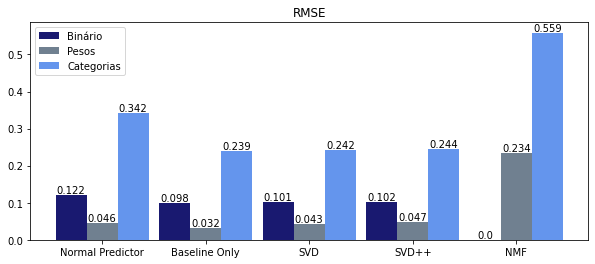

In [12]:
rmse_dict = {'Binário': list(metrics_binario['RMSE']), 'Pesos': list(metrics_pesos['RMSE']), 'Categorias': metrics_categorias['RMSE'], 'Index': index}
x = np.arange(5)
w = 0.3

plt.figure(figsize=(10,4))
plt.bar(x-0.3, list(rmse_dict['Binário']), w, color='midnightblue')
plt.bar(x, list(rmse_dict['Pesos']), w,color='slategrey')
plt.bar(x+0.3, list(rmse_dict['Categorias']), w,color='cornflowerblue')
plt.xticks(range(len(rmse_dict['Binário'])), list(rmse_dict['Index']))
addlabels(range(len(rmse_dict['Binário'])), list(rmse_dict['Binário']), 0.005, -0.3)
addlabels(range(len(rmse_dict['Pesos'])), list(rmse_dict['Pesos']), 0.005, 0)
addlabels(range(len(rmse_dict['Categorias'])), list(rmse_dict['Categorias']), 0.005, 0.3)
plt.legend(['Binário', 'Pesos', 'Categorias'])
plt.title('RMSE')

plt.show()

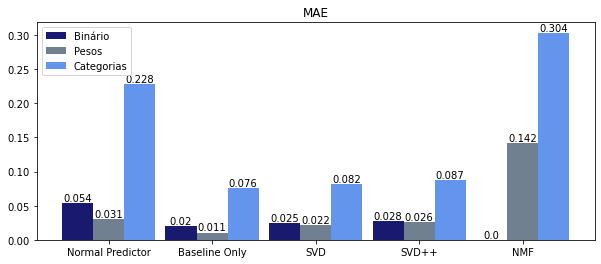

In [13]:
mae_dict = {'Binário': list(metrics_binario['MAE']), 'Pesos': list(metrics_pesos['MAE']), 'Categorias': metrics_categorias['MAE'], 'Index': index}
x = np.arange(5)
w = 0.3

plt.figure(figsize=(10,4))
plt.bar(x-0.3, list(mae_dict['Binário']), w, color='midnightblue')
plt.bar(x, list(mae_dict['Pesos']), w,color='slategrey')
plt.bar(x+0.3, list(mae_dict['Categorias']), w,color='cornflowerblue')
plt.xticks(range(len(mae_dict['Binário'])), list(mae_dict['Index']))
addlabels(range(len(mae_dict['Binário'])), list(mae_dict['Binário']), 0.003, -0.3)
addlabels(range(len(mae_dict['Pesos'])), list(mae_dict['Pesos']), 0.003, 0)
addlabels(range(len(mae_dict['Categorias'])), list(mae_dict['Categorias']), 0.003, 0.3)
plt.legend(['Binário', 'Pesos', 'Categorias'])
plt.title('MAE')

plt.show()

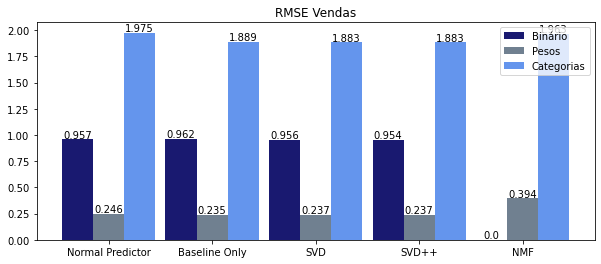

In [14]:
rmse_sale_dict = {'Binário': list(metrics_binario['RMSE Sale']), 'Pesos': list(metrics_pesos['RMSE Sale']), 'Categorias': metrics_categorias['RMSE Sale'], 'Index': index}
x = np.arange(5)
w = 0.3

plt.figure(figsize=(10,4))
plt.bar(x-0.3, list(rmse_sale_dict['Binário']), w, color='midnightblue')
plt.bar(x, list(rmse_sale_dict['Pesos']), w,color='slategrey')
plt.bar(x+0.3, list(rmse_sale_dict['Categorias']), w,color='cornflowerblue')
plt.xticks(range(len(rmse_sale_dict['Binário'])), list(rmse_sale_dict['Index']))
addlabels(range(len(rmse_sale_dict['Binário'])), list(rmse_sale_dict['Binário']), 0.015, -0.3)
addlabels(range(len(rmse_sale_dict['Pesos'])), list(rmse_sale_dict['Pesos']), 0.015, 0)
addlabels(range(len(rmse_sale_dict['Categorias'])), list(rmse_sale_dict['Categorias']), 0.015, 0.3)
plt.legend(['Binário', 'Pesos', 'Categorias'])
plt.title('RMSE Vendas')

plt.show()

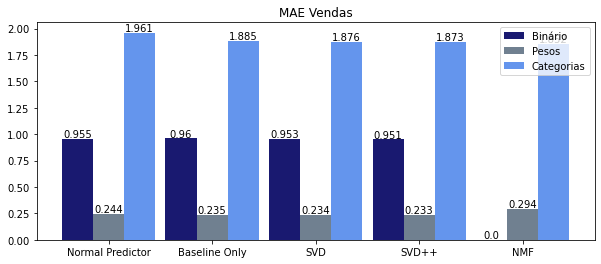

In [15]:
mae_sale_dict = {'Binário': list(metrics_binario['MAE Sale']), 'Pesos': list(metrics_pesos['MAE Sale']), 'Categorias': metrics_categorias['MAE Sale'], 'Index': index}
x = np.arange(5)
w = 0.3

plt.figure(figsize=(10,4))
plt.bar(x-0.3, list(mae_sale_dict['Binário']), w, color='midnightblue')
plt.bar(x, list(mae_sale_dict['Pesos']), w,color='slategrey')
plt.bar(x+0.3, list(mae_sale_dict['Categorias']), w,color='cornflowerblue')
plt.xticks(range(len(mae_sale_dict['Binário'])), list(mae_sale_dict['Index']))
addlabels(range(len(mae_sale_dict['Binário'])), list(mae_sale_dict['Binário']), 0.015, -0.3)
addlabels(range(len(mae_sale_dict['Pesos'])), list(mae_sale_dict['Pesos']), 0.015, 0)
addlabels(range(len(mae_sale_dict['Categorias'])), list(mae_sale_dict['Categorias']), 0.015, 0.3)
plt.legend(['Binário', 'Pesos', 'Categorias'])
plt.title('MAE Vendas')

plt.show()

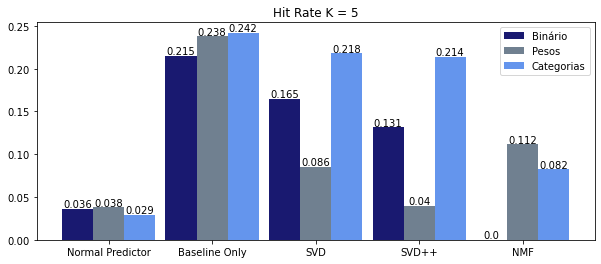

In [16]:
hit_5_dict = {'Binário': list(metrics_binario['Hit Rate K = 5']), 'Pesos': list(metrics_pesos['Hit Rate K = 5']), 'Categorias': metrics_categorias['Hit Rate K = 5'], 'Index': index}
x = np.arange(5)
w = 0.3

plt.figure(figsize=(10,4))
plt.bar(x-0.3, list(hit_5_dict['Binário']), w, color='midnightblue')
plt.bar(x, list(hit_5_dict['Pesos']), w,color='slategrey')
plt.bar(x+0.3, list(hit_5_dict['Categorias']), w,color='cornflowerblue')
plt.xticks(range(len(hit_5_dict['Binário'])), list(hit_5_dict['Index']))
addlabels(range(len(hit_5_dict['Binário'])), list(hit_5_dict['Binário']), 0.0015, -0.3)
addlabels(range(len(hit_5_dict['Pesos'])), list(hit_5_dict['Pesos']), 0.0015, 0)
addlabels(range(len(hit_5_dict['Categorias'])), list(hit_5_dict['Categorias']), 0.0015, 0.3)
plt.legend(['Binário', 'Pesos', 'Categorias'])
plt.title('Hit Rate K = 5')

plt.show()

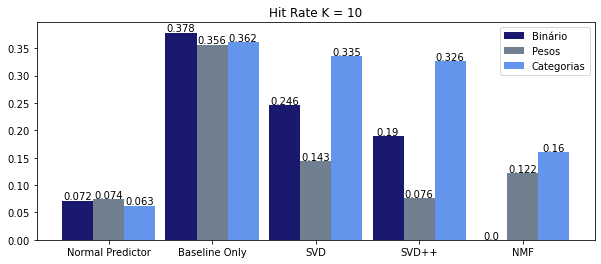

In [17]:
hit_10_dict = {'Binário': list(metrics_binario['Hit Rate K = 10']), 'Pesos': list(metrics_pesos['Hit Rate K = 10']), 'Categorias': metrics_categorias['Hit Rate K = 10'], 'Index': index}
x = np.arange(5)
w = 0.3

plt.figure(figsize=(10,4))
plt.bar(x-0.3, list(hit_10_dict['Binário']), w, color='midnightblue')
plt.bar(x, list(hit_10_dict['Pesos']), w,color='slategrey')
plt.bar(x+0.3, list(hit_10_dict['Categorias']), w,color='cornflowerblue')
plt.xticks(range(len(hit_10_dict['Binário'])), list(hit_10_dict['Index']))
addlabels(range(len(hit_10_dict['Binário'])), list(hit_10_dict['Binário']), 0.002, -0.3)
addlabels(range(len(hit_10_dict['Pesos'])), list(hit_10_dict['Pesos']), 0.002, 0)
addlabels(range(len(hit_10_dict['Categorias'])), list(hit_10_dict['Categorias']), 0.002, 0.3)
plt.legend(['Binário', 'Pesos', 'Categorias'])
plt.title('Hit Rate K = 10')

plt.show()